In [1]:
import rawpy
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imageio
from PIL import Image

# 白平衡处理

[[1 0]
 [2 3]]
R: 1646.9755 G: 792.1959 B: 1451.6376


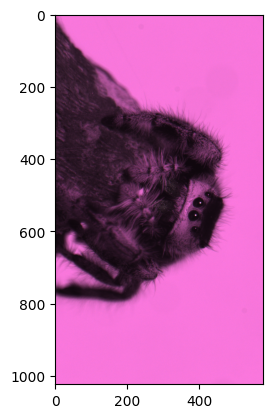

In [ ]:
with rawpy.imread('../dng/sensor_raw_1739931353426.dng') as raw:
    print(raw.raw_pattern)
    bayer = raw.raw_image_visible.astype(np.float32)
    # wb = raw.camera_whitebalance
    wb = np.array(raw.camera_whitebalance)
    # wb = np.array([2.03113556, 1.0, 1.57051289, 1.7])
    wb = np.array([1560, 1020, 1020, 1380])
    # print(wb)
    
    R = bayer[0::2, 0::2]
    B = bayer[1::2, 1::2]
    G1 = bayer[0::2, 1::2]
    G3 = bayer[1::2, 0::2]
    G = (G1+G3) / 2
    
    #灰度世界假设
    # r_gain = G.mean() / R.mean()  # G/R
    # b_gain = G.mean() / B.mean()  # G/B

    wb = wb / wb[1]
    r_gain, b_gain = wb[0], wb[3]
    
    #白平衡增益
    R *= r_gain  # R通道
    B *= b_gain  # B通道

    print("R:", R.mean(), "G:", G.mean(), "B:", B.mean())
    rgb = np.dstack((R, G, B))
    rgb_show = (rgb / np.percentile(rgb, 99) * 255).clip(0,255).astype(np.uint8)
    rgb_show = np.rot90(rgb_show, 3)
    plt.imshow(rgb_show)
    plt.savefig('1.pdf')

# 颜色校正矩阵

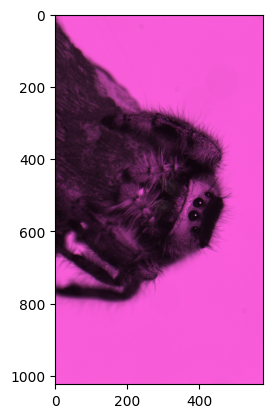

In [138]:
ccm = np.array([
    [1.1, -0.05, -0.05],  # 红通道：增强自身，轻微抑制绿/蓝
    [-0.1, 1.2, -0.1],    # 绿通道：增强自身，轻微抑制红/蓝
    [0.0, -0.15, 1.15]      # 蓝通道：主增益降低，减少对红/绿的抑制
])
rgb_ccm = np.dot(rgb, ccm)

max_val = np.percentile(rgb_ccm, 99)
rgb_show = (rgb_ccm / max_val * 255).clip(0, 255).astype(np.uint8)
rgb_show = np.rot90(rgb_show, 3)

plt.imshow(rgb_show)
plt.savefig('2.pdf')

# sRGB conversion

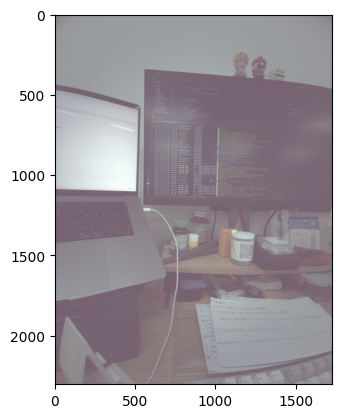

In [133]:
def linear_to_srgb(rgb_linear):
    """ 实现标准sRGB光电转换函数(OETF) """
    cutoff = 0.0031308
    a = 0.055
    rgb_linear = np.clip(rgb_linear, 0, 1)  # 确保输入在[0,1]范围
    
    # 分段处理
    srgb = np.where(
        rgb_linear <= cutoff,
        12.92 * rgb_linear,
        1.055 * np.power(rgb_linear, 1/2.4) - a
    )
    return srgb

max_val = np.percentile(rgb,99.9) 
rgb_normalized = np.clip(rgb / max_val, 0, 1)

rgb_srgb = linear_to_srgb(rgb_normalized)

# 将sRGB转换为8位RGB
rgb_8bit = (rgb_srgb * 255).clip(0, 255).astype(np.uint8)

rgb_8bit = np.rot90(rgb_8bit, 3)
plt.imshow(rgb_8bit)

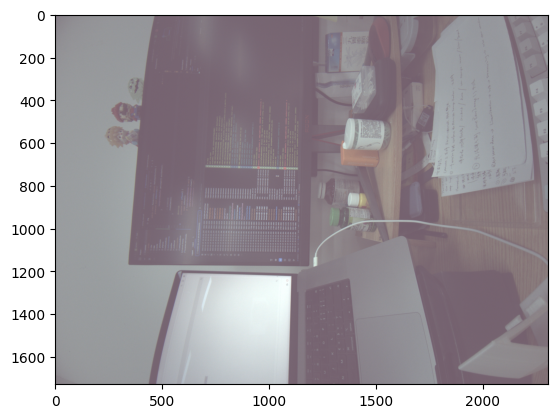

In [135]:
rgb_gamma = np.clip(rgb_normalized, 0, 1)**(1/2.2)
plt.imshow((rgb_gamma * 255).astype(np.uint8))

# 伽马矫正

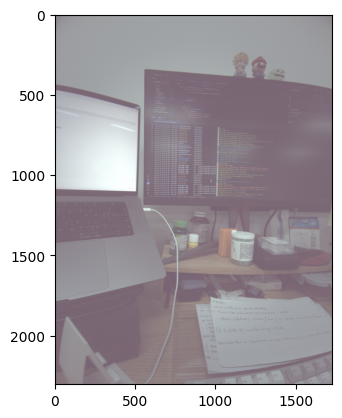

In [126]:
gamma = 2.2

#线性化后再进行伽马校正
max_val = np.percentile(rgb, 99.5)
rgb_norm = (rgb / max_val).clip(0, 1)

rgb_gamma = np.power(rgb_norm, 1/gamma)

rgb_8bit = (rgb_gamma * 255).astype(np.uint8)
rgb_8bit = np.rot90(rgb_8bit,k=3)

plt.imshow(rgb_8bit)
plt.savefig('3.pdf')

[[1 0]
 [2 3]]
[ 760 1020 1020  780]
R: 802.3727 G: 792.1959 B: 820.49097


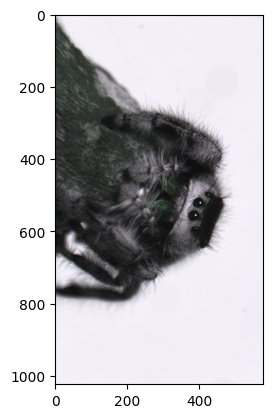

In [148]:
with rawpy.imread('../dng/BLX-0017-20140202-0002338.dng') as raw:
    print(raw.raw_pattern)
    bayer = raw.raw_image_visible.astype(np.float32)
    # wb = raw.camera_whitebalance
    # wb = np.array(raw.camera_whitebalance)
    # wb = np.array([2.03113556, 1.0, 1.57051289, 1.7])
    wb = np.array([760, 1020, 1020, 780])
    print(wb)
    
    R = bayer[0::2, 0::2]
    B = bayer[1::2, 1::2]
    G1 = bayer[0::2, 1::2]
    G3 = bayer[1::2, 0::2]
    G = (G1+G3) / 2
    
    #灰度世界假设
    # r_gain = G.mean() / R.mean()  # G/R
    # b_gain = G.mean() / B.mean()  # G/B

    wb = wb / wb[1]
    r_gain, b_gain = wb[0], wb[3]
    
    #白平衡增益
    R *= r_gain  # R通道
    B *= b_gain  # B通道

    print("R:", R.mean(), "G:", G.mean(), "B:", B.mean())
    rgb = np.dstack((R, G, B))
    rgb_show = (rgb / np.percentile(rgb, 99) * 255).clip(0,255).astype(np.uint8)
    rgb_show = np.rot90(rgb_show, 3)
    plt.imshow(rgb_show)
    plt.savefig('1.pdf')

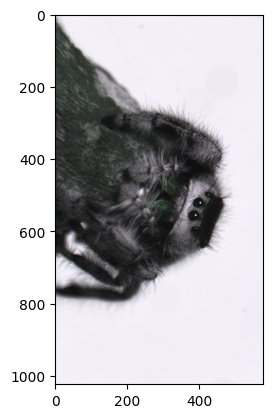

In [149]:
ccm = np.array([
    [1.1, -0.05, -0.05],  
    [-0.1, 1.2, -0.1],    
    [0.0, -0.15, 1.15]     
])

ccm = np.array([
    [1., -0.0, -0.0],  
    [-0., 1., -0.0],    
    [0.0, -0., 1.]     
])

rgb_ccm = np.dot(rgb, ccm)

max_val = np.percentile(rgb_ccm, 99)
rgb_show = (rgb_ccm / max_val * 255).clip(0, 255).astype(np.uint8)
rgb_show = np.rot90(rgb_show, 3)

plt.imshow(rgb_show)
plt.savefig('2.pdf')

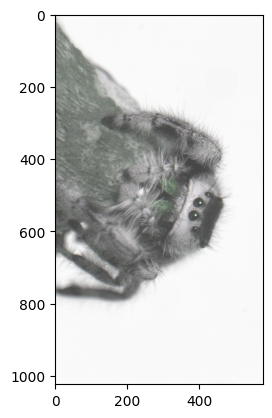

In [144]:
def linear_to_srgb(rgb_linear):
    """ 实现标准sRGB光电转换函数(OETF) """
    cutoff = 0.0031308
    a = 0.055
    rgb_linear = np.clip(rgb_linear, 0, 1)  # 确保输入在[0,1]范围
    
    # 分段处理
    srgb = np.where(
        rgb_linear <= cutoff,
        12.92 * rgb_linear,
        1.055 * np.power(rgb_linear, 1/2.4) - a
    )
    return srgb

max_val = np.percentile(rgb,99.9) 
rgb_normalized = np.clip(rgb / max_val, 0, 1)

rgb_srgb = linear_to_srgb(rgb_normalized)

# 将sRGB转换为8位RGB
rgb_8bit = (rgb_srgb * 255).clip(0, 255).astype(np.uint8)

rgb_8bit = np.rot90(rgb_8bit, 3)
plt.imshow(rgb_8bit)

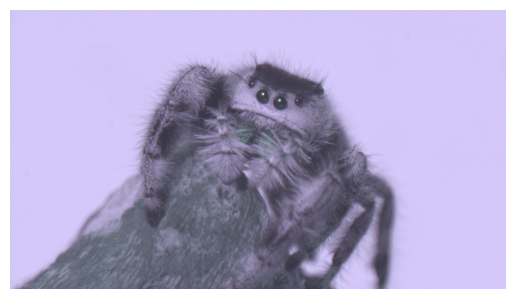

In [163]:
import rawpy
import numpy as np
import matplotlib.pyplot as plt

def linear_to_srgb(rgb_linear):
    """将线性RGB转换为sRGB色彩空间（含伽马校正）"""
    cutoff = 0.0031308
    a = 0.055
    rgb_linear = np.clip(rgb_linear, 0, 1)
    srgb = np.where(
        rgb_linear <= cutoff,
        12.92 * rgb_linear,
        1.055 * np.power(rgb_linear, 1/2.4) - a
    )
    return srgb

def process_dng(dng_path, ccm=None, wb_method='camera', output_gamma=2.2):
    """处理DNG图像的完整流程"""
    with rawpy.imread(dng_path) as raw:
        # 1. 读取Bayer数据
        bayer = raw.raw_image_visible.astype(np.float32)
        
        # 2. 提取RGGB通道（假设raw_pattern=[[0 1], [3 2]]）
        R = bayer[0::2, 0::2]   # 红色通道
        Gr = bayer[0::2, 1::2]  # 绿色通道（偶数行）
        Gb = bayer[1::2, 0::2]  # 绿色通道（奇数行）
        B = bayer[1::2, 1::2]   # 蓝色通道
        G = (Gr + Gb) / 2       # 合并绿色通道

        # 3. 白平衡处理
        if wb_method == 'camera':
            # 使用相机内置白平衡系数
            wb = np.array(raw.camera_whitebalance)
            wb_scale = wb / wb[1]  # 归一化到绿色通道
            r_gain, b_gain = wb_scale[0], wb_scale[3]
        else:
            # 灰度世界假设（备用方案）
            r_gain = G.mean() / R.mean()
            b_gain = G.mean() / B.mean()
        
        R *= r_gain
        B *= b_gain

        # 4. 组合RGB图像
        rgb = np.dstack((R, G, B))

        # 5. 应用颜色校正矩阵（CCM）
        if ccm is None:
            # 默认CCM（需根据实际传感器校准）
            ccm = np.array([
    [1.3, -0.1, -0.2],  # 降低红色增益，抑制绿色对红色的影响
    [-0.3, 1.2, 0.1],  # 降低绿色增益，抑制红色/蓝色对绿色的影响
    [-0.1, -0.3, 1.4]   # 增强蓝色，允许红色/绿色补偿
            ])
        rgb_ccm = np.dot(rgb, ccm)

        # 6. 动态范围归一化
        max_val = np.percentile(rgb_ccm, 99.99)
        rgb_normalized = np.clip(rgb_ccm / max_val, 0, 1)

        # 7. sRGB转换 + 伽马校正
        rgb_srgb = linear_to_srgb(rgb_normalized)

        # 8. 转换为8位图像并旋转方向
        rgb_8bit = (rgb_srgb * 255).clip(0, 255).astype(np.uint8)
        # rgb_8bit = np.rot90(rgb_8bit, 3)  # 旋转270度校正方向

        # 显示结果
        plt.imshow(rgb_8bit)
        plt.axis('off')
        plt.show()
        
        return rgb_8bit

# ---------------------- 使用示例 ----------------------
if __name__ == "__main__":
    # 定义CCM（可替换为校准后的矩阵）
    custom_ccm = np.array([
         [1.3, -0.1, -0.2],  # 降低红色增益，抑制绿色对红色的影响
    [-0.3, 1.2, 0.1],  # 降低绿色增益，抑制红色/蓝色对绿色的影响
    [-0.1, -0.3, 1.4]   # 增强蓝色，允许红色/绿色补偿
    ])
    
    # 处理DNG图像
    output = process_dng(
        dng_path='../dng/spider2.dng',
        ccm=custom_ccm,
        wb_method='grayworld'  # 可选 'camera' 或 'grayworld'
    )